# Milestone 4: Analysis and Visualisation

### Notebook setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Importing transformed CSV files into DataFrames
df = pd.read_csv('transformed_loandata.csv')
transformed_df = pd.read_csv('log_transformed_loandata.csv')

## Task 1: Current State of the loans

#### Key steps: 
#### 1.1 Querying data to check the current state of payments


In [4]:
pd.set_option('display.max_columns', None)
#transformed_loandata_df = pd.read_csv("transformed_loandata.csv")


df.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,0,0,38676116,41461848,8000,8000.0,8000.0,36.0,7.49,248.82,A,A4,5.0,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,1,1,38656203,41440010,13200,13200.0,13200.0,36.0,6.99,407.52,A,A3,9.0,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,2,2,38656154,41439961,16000,16000.0,16000.0,36.0,7.49,497.63,A,A4,8.0,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,3,3,38656128,41439934,15000,15000.0,15000.0,36.0,14.31,514.93,C,C4,1.0,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,4,4,38656121,41439927,15000,15000.0,15000.0,36.0,6.03,456.54,A,A1,10.0,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


#### 1.2 Identify % of loans recovered against investor funding and total amount funded.  Visualise results.

Total Loan Amount =  723066050
Total Funded Amount =  717449508.91
Total Funded Amount Inv =  702433696.79
Total Payment Amount =  655067555.06
Total Recoveries =  5070668.34
Percentage of loans recovered against total amount funded = 0.71
Percentage of loans recovered against investor funding = 0.72


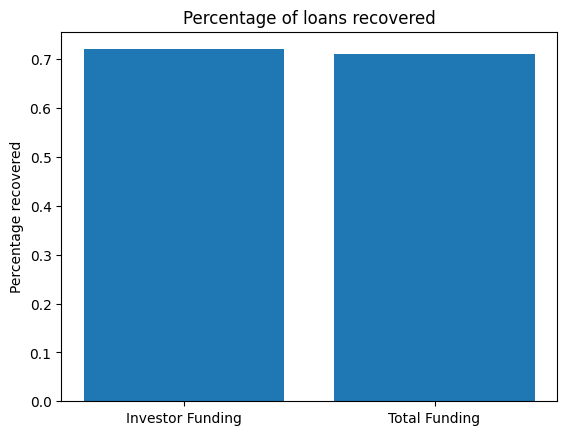

In [5]:
# Sum relevant loan columns

total_loan_amount = round(df['loan_amount'].sum(), 2)
total_funded_amount = round(df['funded_amount'].sum(), 2)
total_funded_amount_inv = round(df['funded_amount_inv'].sum(), 2)
total_payment = round(df['total_payment'].sum(), 2)
total_recoveries = round(df['recoveries'].sum(), 2)

print("Total Loan Amount = ", total_loan_amount)
print("Total Funded Amount = ", total_funded_amount)
print("Total Funded Amount Inv = ", total_funded_amount_inv)
print("Total Payment Amount = ", total_payment)
print("Total Recoveries = ", total_recoveries)

# Calculate % of loans recovered against investor funding and total amount funded

loans_rec_inv = round((total_recoveries / total_funded_amount_inv * 100),2)

loans_rec_total = round((total_recoveries / total_funded_amount * 100), 2)

print("Percentage of loans recovered against total amount funded =", loans_rec_total)
print("Percentage of loans recovered against investor funding =", loans_rec_inv)

# Visualise results in a bar chart
x = ['Investor Funding', 'Total Funding']
y = [loans_rec_inv, loans_rec_total]
fig, ax = plt.subplots()
barchart = ax.bar(x, y)
ax.set_ylabel("Percentage recovered")
ax.set_title("Percentage of loans recovered")
# barchart = plt.barh(x, y)
# barchart.title("Percentage of loans recovered")
plt.show()


#### This shows that the percentage of loans recovered against the total amount funded is almost identical 

#### 1.3 What % of the total amount would be recovered up to 6 months in the future

#### Check different loan_status definitions

In [6]:
loan_status = df['loan_status'].value_counts()

print(loan_status)


loan_status
Fully Paid                                             27037
Current                                                19268
Charged Off                                             5571
Does not meet the credit policy. Status:Fully Paid       984
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      368
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: count, dtype: int64


In [7]:
print(df['loan_status'].sum())

CurrentCurrentFully PaidFully PaidCurrentCurrentFully PaidCharged OffCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentLate (31-120 days)CurrentCurrentCurrentCurrentCurrentCurrentCurrentFully PaidCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentFully PaidCurrentFully PaidCurrentFully PaidFully PaidCurrentCurrentFully PaidFully PaidFully PaidCurrentFully PaidCurrentCurrentFully PaidCurrentCurrentCharged OffCurrentFully PaidCurrentCurrentCurrentCurrentFully PaidCurrentFully PaidFully PaidCurrentCurrentCurrentCurrentCurrentFully PaidFully PaidFully PaidFully PaidFully PaidCurrentCurrentCurrentFully PaidCurrentFully PaidCharged OffCurrentCurrentCurrentCurrentCurrentCurrentCharged OffFully PaidFully PaidCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCurrentCharged OffCurrentCurrentCurrentCurrentCurrentCurrentFully PaidCurrentCurren

#### I want to differentiate between fully paid loans, active and inactive customers

In [8]:
a_fully_paid_loans = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
b_active_loans = ['Current','Late (31-120 days)', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)']
c_inactive_loans = ['Charged Off','Does not meet the credit policy. Status:Charged Off', 'Default']

mask_a = df['loan_status'].isin(a_fully_paid_loans)
mask_b = df['loan_status'].isin(b_active_loans)
mask_c = df['loan_status'].isin(c_inactive_loans)

subset_fully_paid_loans_df = df[mask_a]
subset_active_loans_df = df[mask_b]
subset_inactive_loans_df = df[mask_c]


#### Sum of total loan payments received and monthly instalments

In [9]:
# Summing total loan payments

total_paid_fully_paid_loans = subset_fully_paid_loans_df['total_payment'].sum()
# print(round(total_paid_fully_paid_loans, 2))
total_paid_active_loans = subset_active_loans_df['total_payment'].sum()
total_paid_inactive_loans = subset_inactive_loans_df['total_payment'].sum()

# Summing monthly instalments (not needed for loans that have already been paid off)

monthly_instalment_active_loans = subset_active_loans_df['instalment'].sum()
monthly_instalment_inactive_loans = subset_inactive_loans_df['instalment'].sum()

#### Calculate the total payments expected in 6 months

In [10]:
current_total_loan_payment_six_months = total_paid_fully_paid_loans + total_paid_active_loans + total_paid_inactive_loans
instalments_due_next_six_months = (monthly_instalment_active_loans + monthly_instalment_inactive_loans) * 6
expected_instalments_next_six_months = (monthly_instalment_active_loans) * 6

print(current_total_loan_payment_six_months)
print(instalments_due_next_six_months)
print(expected_instalments_next_six_months)


655067555.0639842
67968350.10000001
53674587.120000005


#### Summarise the results

Total Loan Amount =  723066050
Total Amount Currently Repaid =  655067555.06
Total Amount Due to be Repaid in 6 months time =  723035905.16
Forecast Amount to be Repaid in 6 months (ignoring inactive accounts) =  708742142.18
Total Amount Due in 6 months of Total Loan Amounts ((%)=  100.0
Forecast Amount to be Repaid in 6 months of Total Loan Amounts (%) =  98.02


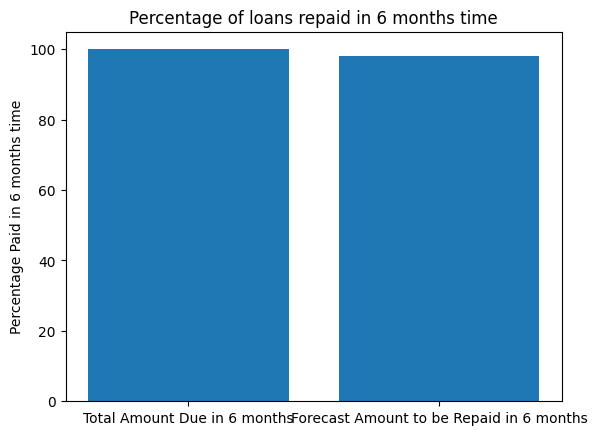

In [11]:
print("Total Loan Amount = ", total_loan_amount)
print("Total Amount Currently Repaid = ", round(current_total_loan_payment_six_months, 2))
print("Total Amount Due to be Repaid in 6 months time = ", round(current_total_loan_payment_six_months + instalments_due_next_six_months, 2))
print("Forecast Amount to be Repaid in 6 months (ignoring inactive accounts) = ", round(current_total_loan_payment_six_months + expected_instalments_next_six_months, 2))

total_due_percent = round(((current_total_loan_payment_six_months + instalments_due_next_six_months) / total_loan_amount) * 100, 2)
forecast_to_be_paid_percent = round(((current_total_loan_payment_six_months + expected_instalments_next_six_months) / total_loan_amount) * 100, 2) 


print("Total Amount Due in 6 months of Total Loan Amounts ((%)= ", total_due_percent)
print("Forecast Amount to be Repaid in 6 months of Total Loan Amounts (%) = ", forecast_to_be_paid_percent)

# Visualise results in a bar chart
x = ['Total Amount Due in 6 months', 'Forecast Amount to be Repaid in 6 months']
y = [total_due_percent, forecast_to_be_paid_percent]
fig, ax = plt.subplots()
barchart = ax.bar(x, y)
ax.set_ylabel("Percentage Paid in 6 months time")
ax.set_title("Percentage of loans repaid in 6 months time")
# barchart = plt.barh(x, y)
# barchart.title("Percentage of loans recovered")
plt.show()


## Task 2: Calculating loss
### Loans marked as Charged Off in the loan_status column represent a loss to the company.
### Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [12]:
# Find the total number of loans

total_number_of_loans = df['loan_status'].count()
print("The total number of loans = ", total_number_of_loans)

# Find the number of loans with Charged Off status

number_of_loans_charged_off = loan_status['Charged Off']
print("The number of loans with 'Charged Off' status = ", number_of_loans_charged_off)

# Percentage of loans with Charged Off status
print(round((number_of_loans_charged_off / total_number_of_loans) * 100, 1), " percent of loans have been Charged Off")

# Calculate total amount paid towards loans when Charged Off

total_loan_amount_charged_off = round(np.where(df['loan_status'] == "Charged Off", df['loan_amount'],0).sum(), 0)
total_paid_charged_off = round(np.where(df['loan_status'] == "Charged Off", df['total_payment'],0).sum(), 0)

print("Total value of loans that are Charged Off = ", total_loan_amount_charged_off)
print("Total amount paid for loans that are Charged Off = ", total_paid_charged_off)
print(round((total_paid_charged_off / total_loan_amount_charged_off) * 100, 1), " percent of Charged Off loan value has been paid back")



The total number of loans =  54231
The number of loans with 'Charged Off' status =  5571
10.3  percent of loans have been Charged Off
Total value of loans that are Charged Off =  76359400
Total amount paid for loans that are Charged Off =  37400589.0
49.0  percent of Charged Off loan value has been paid back


## Task 3: Calculating projected loss

### Calculate the projected loss of the loans marked as Charged Off.
### Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

Theoretical full term revenue of Charged Off loans = 103,536,519.0
Actual payment revenue from Charged Off loans = 37,400,589.0
Loss of revenue from Charged Off loans = -66,135,930.0


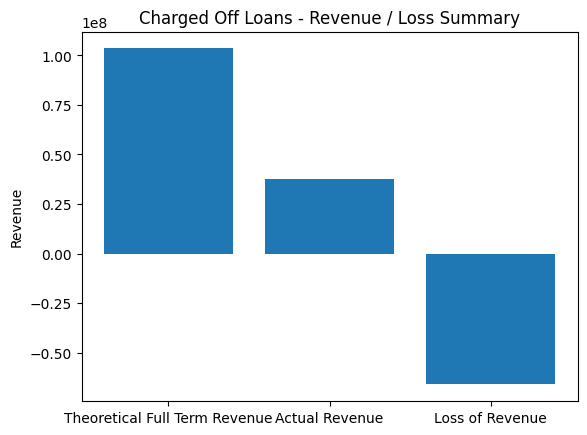

In [13]:
# Add a column to the DataFrame to show the theoretical value of a loan that had run its full term

df['full_term_value'] = df['instalment'] * df['term']

# Calculate the theoretical revenue of Charged Off loans if they had run their full term

full_term_charged_off = round(np.where(df['loan_status'] == "Charged Off", df['full_term_value'],0).sum(), 0)

# Calculate the actual revenue of Charged Off loans

total_payments_charged_off = round(np.where(df['loan_status'] == "Charged Off", df['total_payment'],0).sum(), 0)

# Calculate the loss incurred

charged_off_loss = round(total_payments_charged_off - full_term_charged_off, 2)

print(f"Theoretical full term revenue of Charged Off loans = {full_term_charged_off:,}")
print(f"Actual payment revenue from Charged Off loans = {total_payments_charged_off:,}")
print(f"Loss of revenue from Charged Off loans = {charged_off_loss:,}")

# Visualise the loss
# Visualise results in a bar chart
x = ['Theoretical Full Term Revenue', 'Actual Revenue', 'Loss of Revenue']
y = [full_term_charged_off, total_payments_charged_off, charged_off_loss]
fig, ax = plt.subplots()
barchart = ax.bar(x, y)
ax.set_ylabel("Revenue")
ax.set_title("Charged Off Loans - Revenue / Loss Summary")
plt.show()


## Task 4: Possible loss

### Identify customers currently behind on their loan payments
### What percentage do users' in this bracket currently represent as a percentage of all loans?

In [14]:
late_payment_customers = ['Late (16-30 days)', 'Late (31-120 days)']

mask = df['loan_status'].isin(late_payment_customers)

late_payment_df = df[mask]

# Find the number of loans with late payment status

number_late_payment = late_payment_df['loan_status'].count()

print("There are currently", number_late_payment, "loans with late payment status.")

print("This represents", round((number_late_payment / total_number_of_loans) * 100, 1), "% of all loan accounts.")



There are currently 686 loans with late payment status.
This represents 1.3 % of all loan accounts.


### Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off.

In [15]:
print("There are currently", number_late_payment, "loans with late payment status.")

# Calculate the theoretical revenue of Charged Off loans if they had run their full term

full_term_late_payment = round((late_payment_df['full_term_value']).sum(), 0)

# Calculate the actual revenue of Charged Off loans

total_payments_late_payees = round((late_payment_df['total_payment']).sum(), 0)

# Calculate the loss incurred

charged_off_loss_late_payees = round(total_payments_late_payees - full_term_late_payment, 2)

print(f"Theoretical full term revenue of late payment loans = {full_term_late_payment:,}")
print(f"Actual payment revenue from late payment loans = {total_payments_late_payees:,}")
print(f"Loss of revenue if late payment loans became Charged Off = {charged_off_loss_late_payees:,}")



There are currently 686 loans with late payment status.
Theoretical full term revenue of late payment loans = 14,411,505.0
Actual payment revenue from late payment loans = 6,894,025.0
Loss of revenue if late payment loans became Charged Off = -7,517,480.0


### What is the projected loss of these loans if the customer were to finish the full loans term?

In [16]:
# Calculate loss based on total loan_amount, less total out_prncp (the emaining outstanding principal for total amount funded)

projected_full_term_loss = late_payment_df['out_prncp'].sum() - late_payment_df['loan_amount'].sum()

print(f"The projected loss of these loans if the customer finishes the full loans term = {projected_full_term_loss:,}")



The projected loss of these loans if the customer finishes the full loans term = -4,278,069.38


### If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [17]:
# Calculate total expected revenue from all loan customers
total_all_loan_expected_revenue = round(df['full_term_value'].sum(), 0)
print(f"Total expected revenue from all customer loans is = {total_all_loan_expected_revenue:,}")

existing_default_share = round((full_term_charged_off / total_all_loan_expected_revenue * 100),1)
late_payment_share = round((full_term_late_payment / total_all_loan_expected_revenue * 100), 1)

print(f"Total expected revenue for customers who have already defaulted = {full_term_charged_off:,}, representing {existing_default_share} % of all customer loan revenue")
print(f"Total expected revenue for customers late on payment / converting to Charged Off status = {full_term_late_payment:,}, representing {late_payment_share} % of all customer loan revenue")
print(f"Combined, these defaulted and late paying customers represent {existing_default_share + late_payment_share} % of all customer loan revenue")




Total expected revenue from all customer loans is = 940,278,358.0
Total expected revenue for customers who have already defaulted = 103,536,519.0, representing 11.0 % of all customer loan revenue
Total expected revenue for customers late on payment / converting to Charged Off status = 14,411,505.0, representing 1.5 % of all customer loan revenue
Combined, these defaulted and late paying customers represent 12.5 % of all customer loan revenue


## Task 5: Indicators of loss

### Analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.

### Variables that are potential indicators of risk include:
- Grade
- Purpose
- Home Ownership
- Length of Employment



In [18]:
# Creating a subset of users who have already stopped paying loans and those who are behind on payments

high_risk_subset = df[df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)'])]

#### Let's start by looking at the 'Grade'

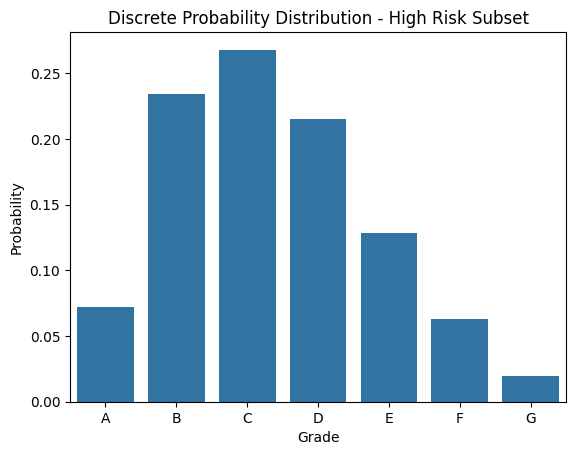

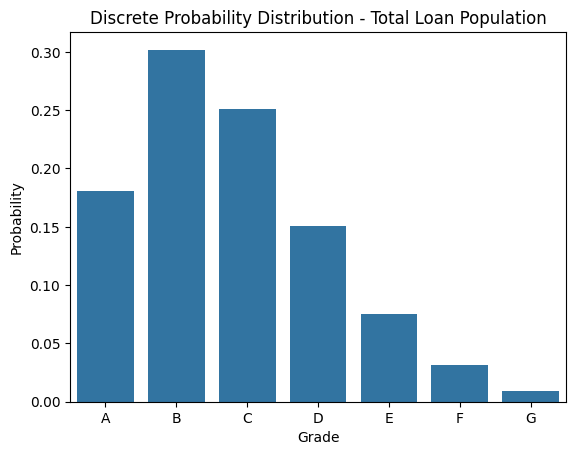

In [19]:
# Calculate value counts and convert to probabilities
probs = high_risk_subset['grade'].value_counts(normalize=True)

grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

dpd=sns.barplot(y=probs.values, x=probs.index, order = grade_order)
plt.xlabel('Grade')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - High Risk Subset')
plt.show()

# Compare with total loan population
probs = df['grade'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index, order = grade_order)
plt.xlabel('Grade')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Total Loan Population')
plt.show()


####  This shows that customers in Grades A and B are less likely to become high risk loans.  Grade C customers have relatively similar risk levels, whereas customers in Grades D, E, F and G are more likely to become high risk customers

### Now we will look at the loan 'purpose'

In [20]:
print(df['purpose'].unique())

['credit_card' 'debt_consolidation' 'home_improvement' 'small_business'
 'renewable_energy' 'major_purchase' 'other' 'moving' 'car' 'medical'
 'house' 'vacation' 'wedding' 'educational']


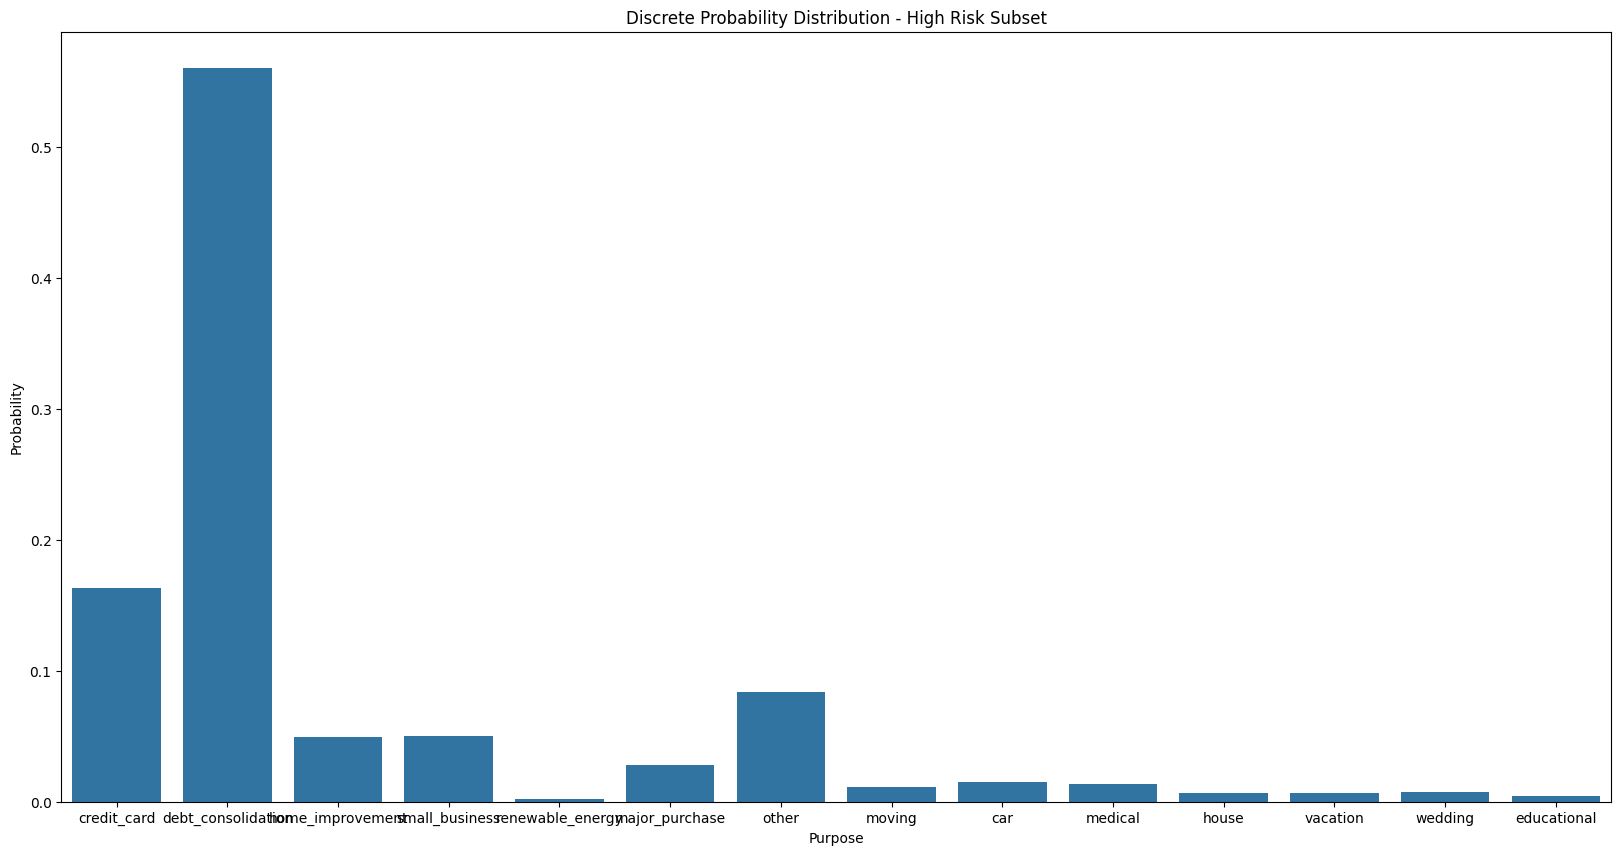

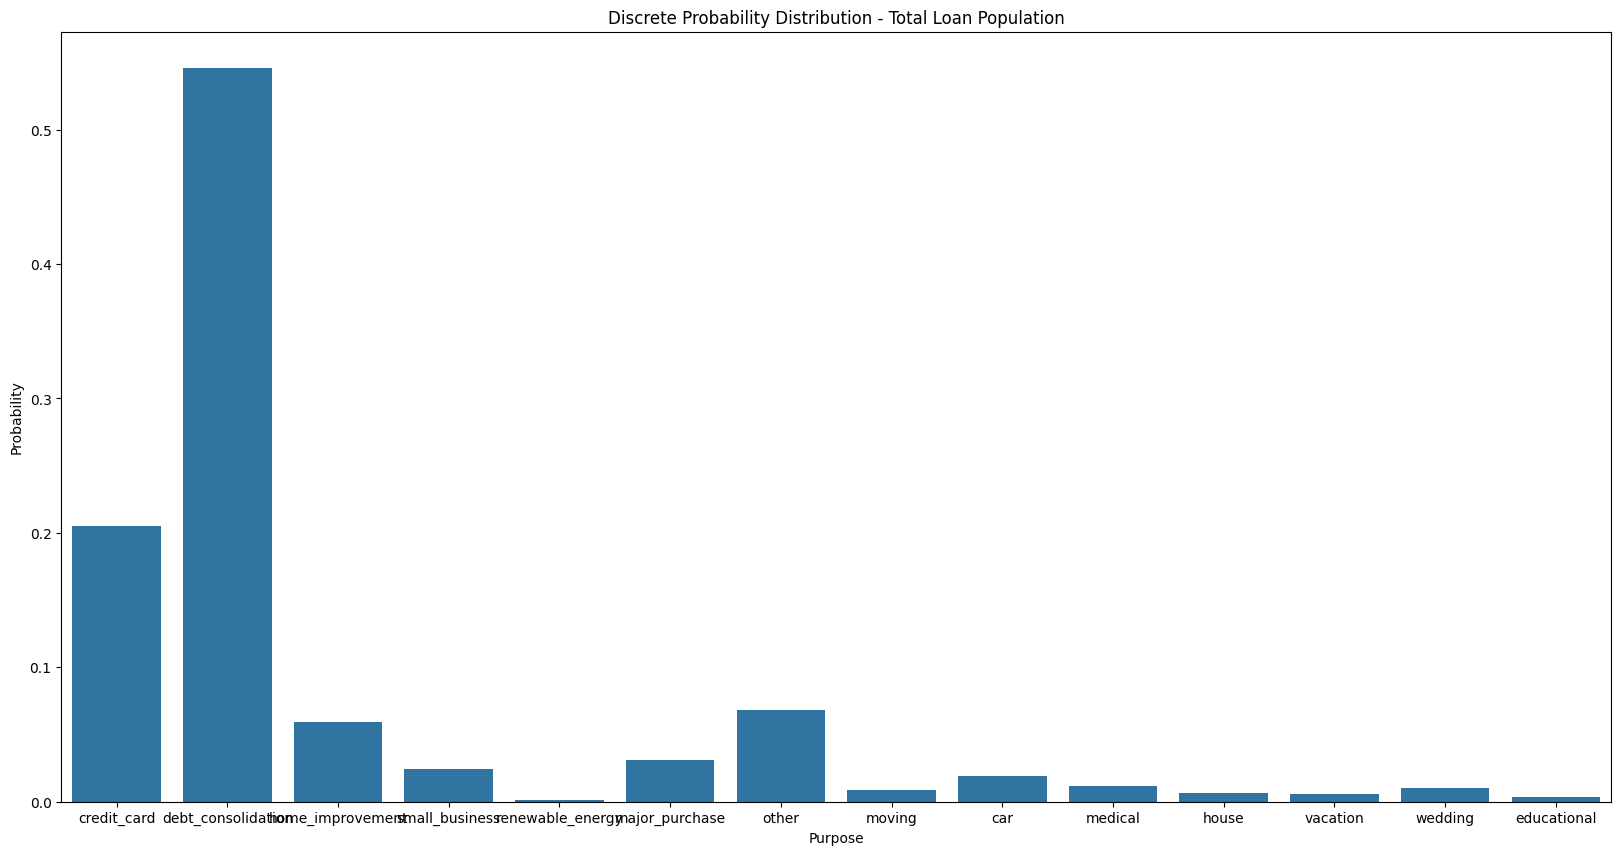

In [21]:
# Calculate value counts and convert to probabilities
probs = high_risk_subset['purpose'].value_counts(normalize=True)

purpose_order = ['credit_card', 'debt_consolidation', 'home_improvement', 'small_business', 'renewable_energy', 'major_purchase', 'other', 'moving', 'car', 'medical', 'house', 'vacation', 'wedding', 'educational']

dpd=sns.barplot(y=probs.values, x=probs.index, order = purpose_order)
plt.gcf().set_size_inches(20,10)
plt.xlabel('Purpose')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - High Risk Subset')
plt.show()

# Compare with total loan population
probs = df['purpose'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index, order = purpose_order)
plt.gcf().set_size_inches(20,10)
plt.xlabel('Purpose')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Total Loan Population')
plt.show()

#### It seems that the loan purporse does not show any significant impact on the likelihood of the loan becoming high risk.

### We will now look at home ownership

In [22]:
print(df['home_ownership'].unique())

['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']


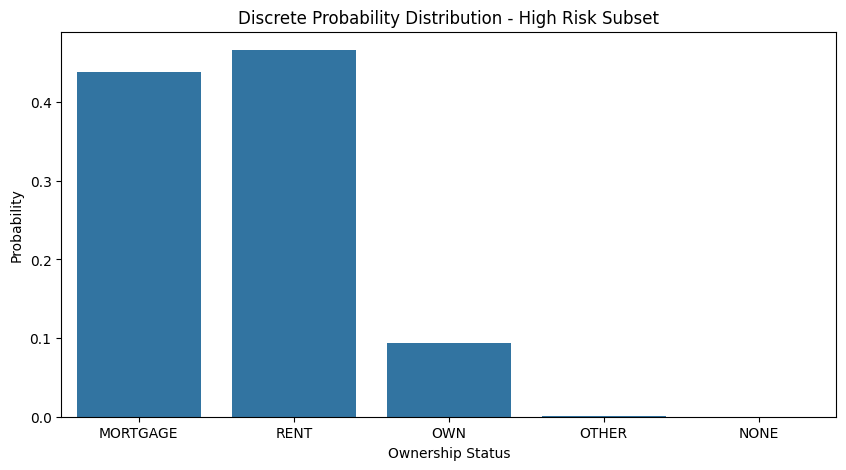

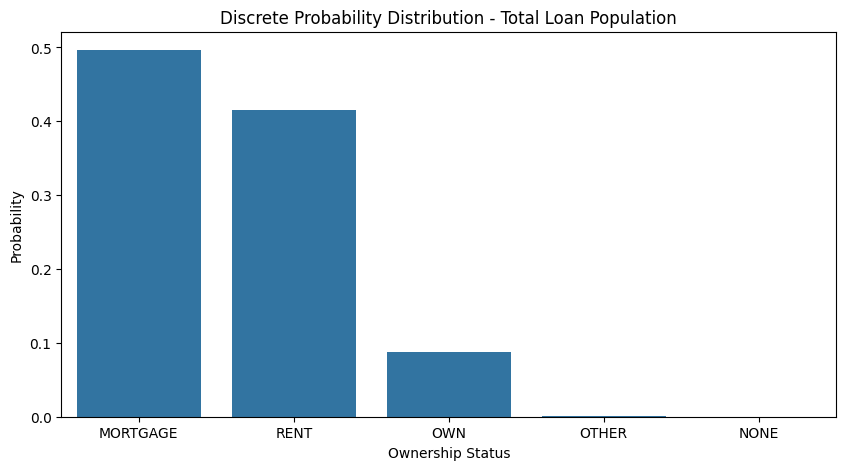

In [28]:
# Calculate value counts and convert to probabilities
probs = high_risk_subset['home_ownership'].value_counts(normalize=True)

ownership_order = ['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE']

dpd=sns.barplot(y=probs.values, x=probs.index, order = ownership_order)
plt.gcf().set_size_inches(10,5)
plt.xlabel('Ownership Status')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - High Risk Subset')
plt.show()

# Compare with total loan population
probs = df['home_ownership'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index, order = ownership_order)
plt.gcf().set_size_inches(10,5)
plt.xlabel('Ownership Status')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Total Loan Population')
plt.show()

#### There appears to be a higher likelihood that a loan will become risky when a customer is using this for RENT.  There is a slignly lower risk when being used as a MORTGAGE.  This makes sense since customers using the loan as a mortgage will be aware their home will be at risk if they default, whereas this is not the case for renters.

### Now let's look at customers' lengths of employment

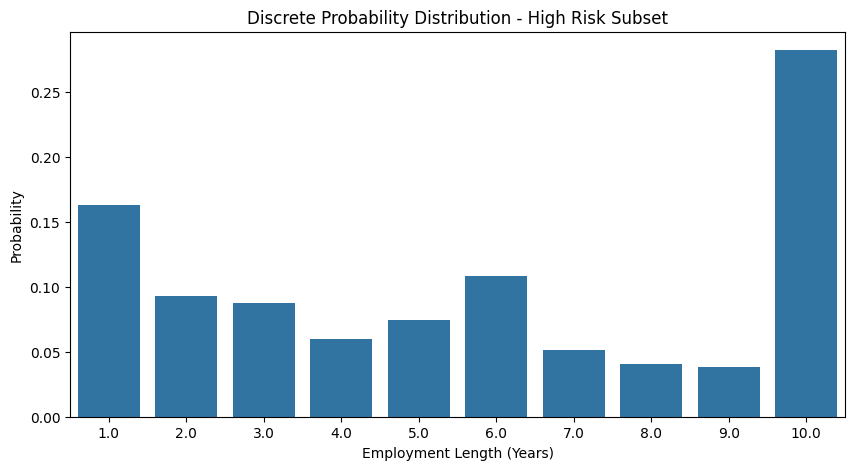

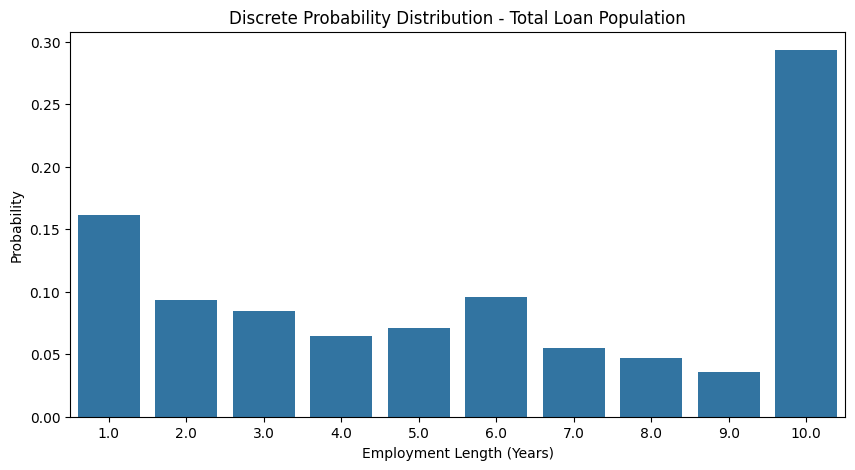

In [31]:
# Calculate value counts and convert to probabilities
probs = high_risk_subset['employment_length'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index)
plt.gcf().set_size_inches(10,5)
plt.xlabel('Employment Length (Years)')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - High Risk Subset')
plt.show()

# Compare with total loan population
probs = df['employment_length'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index)
plt.gcf().set_size_inches(10,5)
plt.xlabel('Employment Length (Years)')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Total Loan Population')
plt.show()

#### There does not appear to be a significant variation when it comes to length of employment between the subset of high risk customers and the wider loan population when it comes to length of employment, so this deemed not to be an indicator.

#### So Grade and Home Ownership appear to be more significant indicators.  I will now compare two separate customer subsets: those who are already charged off and those who have the potential to be charged off.

In [36]:
# Create a subset of Charged Off customers

charged_off_df = df[df['loan_status'].isin(['Charged Off'])]

We will compare both customer subsets firstly in relation to Grade

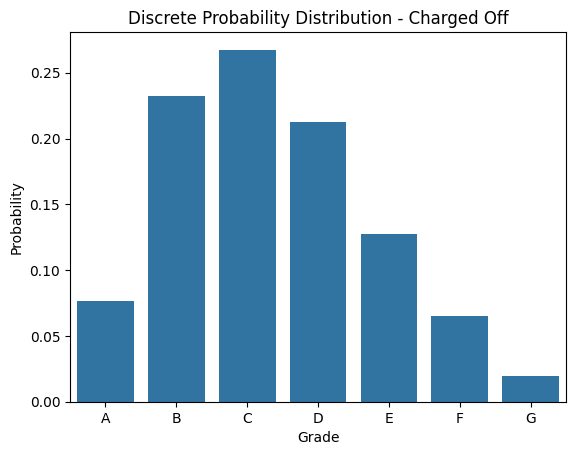

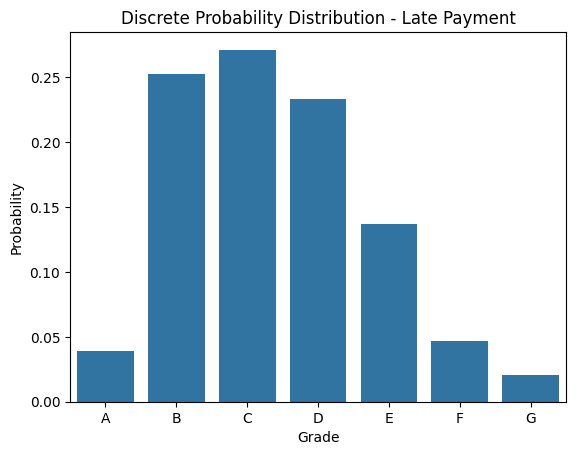

In [38]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

probs = charged_off_df['grade'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index, order = grade_order)
plt.xlabel('Grade')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Charged Off')
plt.show()

# Compare with total loan population
probs = late_payment_df['grade'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index, order = grade_order)
plt.xlabel('Grade')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Late Payment')
plt.show()

#### While there is some variation (lower Grade A / higher Grade B for late payment customers), the overall distribution is very similar.  So we can assume the same factors apply to both groups. 

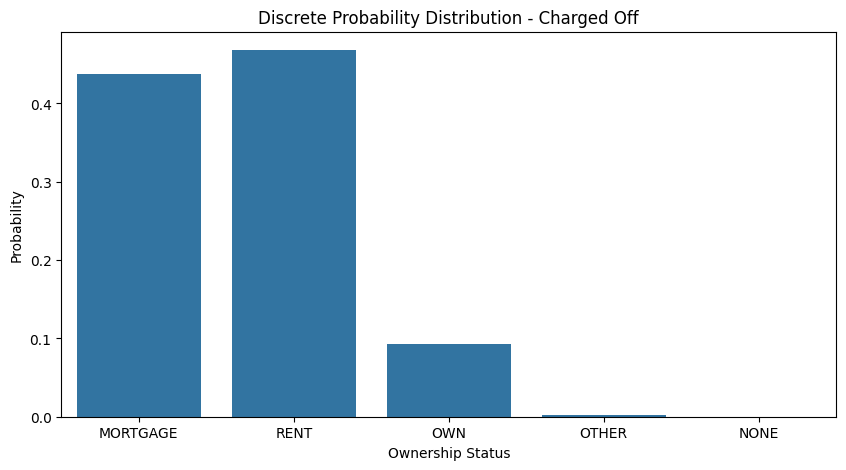

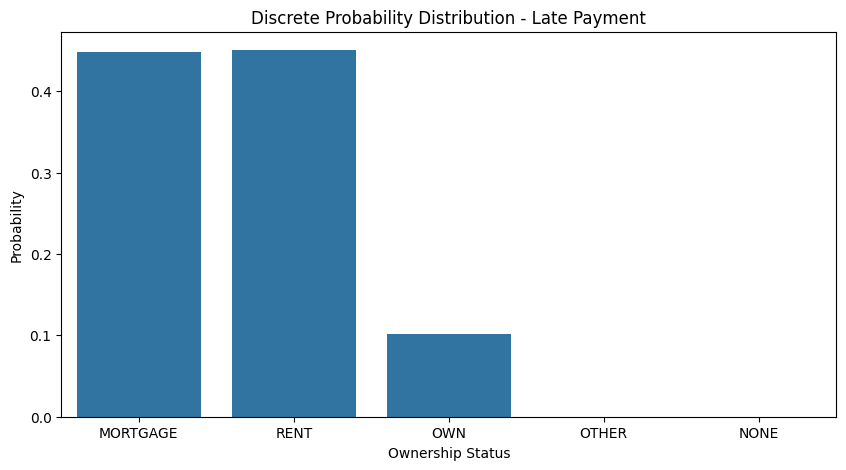

In [39]:
# Calculate value counts and convert to probabilities
probs = charged_off_df['home_ownership'].value_counts(normalize=True)

ownership_order = ['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE']

dpd=sns.barplot(y=probs.values, x=probs.index, order = ownership_order)
plt.gcf().set_size_inches(10,5)
plt.xlabel('Ownership Status')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Charged Off')
plt.show()

# Compare with total loan population
probs = late_payment_df['home_ownership'].value_counts(normalize=True)

dpd=sns.barplot(y=probs.values, x=probs.index, order = ownership_order)
plt.gcf().set_size_inches(10,5)
plt.xlabel('Ownership Status')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution - Late Payment')
plt.show()

#### Similarly, with Ownership Status, we can see strong similarity between the Charged Off and Late Payment customers.  There is a slight higher prevalance of Mortgage customers in the late payment group, but the difference is not dramatic.  They are probably also more likely to try to avoid becoming Charged Off customers to avoid repossession of their home.   